# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Laila Rohmatul I'zzah
- **Email:** mc223d5x0763@student.devacademy.id
- **ID Dicoding:** MC223D5X0763

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan polusi udara (PM₂.₅) di Kota Aotizhongxin saat hari kerja (weekday) dan akhir pekan (weekend)?
- Faktor apa yang mempengaruhi tingkat polusi udara (PM₂.₅) di Kota Aotizhongxin?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [30]:
import pandas as pd

# Ganti dengan URL raw file yang sudah Anda salin
url = "https://raw.githubusercontent.com/lailarizzah/Air-Quality-Dataset/refs/heads/main/data/PRSA_Data_Aotizhongxin.csv"

# Membaca file CSV dari URL, dengan menentukan delimiter (;)
stasiun_df = pd.read_csv(url, delimiter=";", low_memory=False)

# Menampilkan data pertama untuk memastikan
stasiun_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4,7,300.0,77,-0.7,1023,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4,7,300.0,77,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5,10,300.0,73,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11,11,300.0,72,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12,12,300.0,72,-2,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5,35,400.0,95,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7,45,500.0,81,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10,66,700.0,58,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12,87,700.0,35,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


File csv di atas memuat beberapa informasi terkait kualitas udara di Kota Aotizhongxin. Akan dipilih beberapa variabel yang relevan dengan pertanyaan analisis, antara lain:
- year
- month
- day
- PM2.5 (Polusi udara)
- TEMP (Suhu)
- PRES (Tekanan udara)
- WSPM (Kecepatan angin)
- RAIN (Curah hujan)

In [31]:
df_selected = stasiun_df[['year', 'month', 'day', 'PM2.5', 'TEMP', 'PRES',	'WSPM',	'RAIN']]
df_selected

,year,month,day,PM2.5,TEMP,PRES,WSPM,RAIN
0,2013,3,1,4.0,-0.7,1023,4.4,0.0
1,2013,3,1,8.0,-1.1,1023.2,4.7,0.0
2,2013,3,1,7.0,-1.1,1023.5,5.6,0.0
3,2013,3,1,6.0,-1.4,1024.5,3.1,0.0
4,2013,3,1,3.0,-2,1025.2,2.0,0.0
...,...,...,...,...,...,...,...,...
35059,2017,2,28,12.0,12.5,1013.5,2.4,0.0
35060,2017,2,28,13.0,11.6,1013.6,0.9,0.0
35061,2017,2,28,16.0,10.8,1014.2,1.1,0.0
35062,2017,2,28,21.0,10.5,1014.4,1.2,0.0


Tabel di atas diatur supaya hanya menampilkan 8 kolom utama yang relevan dengan pertanyaan analisis saja, kemudian menyimpannya dalam variabel "df_selected"

In [32]:
# Menggabungkan 'year', 'day', 'month' ke dalam variabel 'date'
df_selected = stasiun_df[['year', 'month', 'day', 'PM2.5', 'TEMP', 'PRES',	'WSPM',	'RAIN']].copy()
df_selected['date'] = pd.to_datetime(df_selected[['year', 'month', 'day']])

# Menambahkan date ke dataset
df_selected_new = df_selected[['date', 'PM2.5', 'TEMP', 'PRES',	'WSPM',	'RAIN']]
df_selected_new


,date,PM2.5,TEMP,PRES,WSPM,RAIN
0,2013-03-01,4.0,-0.7,1023,4.4,0.0
1,2013-03-01,8.0,-1.1,1023.2,4.7,0.0
2,2013-03-01,7.0,-1.1,1023.5,5.6,0.0
3,2013-03-01,6.0,-1.4,1024.5,3.1,0.0
4,2013-03-01,3.0,-2,1025.2,2.0,0.0
...,...,...,...,...,...,...
35059,2017-02-28,12.0,12.5,1013.5,2.4,0.0
35060,2017-02-28,13.0,11.6,1013.6,0.9,0.0
35061,2017-02-28,16.0,10.8,1014.2,1.1,0.0
35062,2017-02-28,21.0,10.5,1014.4,1.2,0.0


Pada tahap ini, dilakukan proses manipulasi data agar dataset lebih terstruktur. Caranya dengan menggabungkan kolom 'year', 'month', dan 'day' yang sebelumnya terpisah lalu digabungkan dalam kolom 'date'. Tampilan ini akan memudahkan proses analisis selanjutnya.

### Assessing Data

In [33]:
# Mengubah kolom 'TEMP' dan 'PRES' ke type numerik
df_selected_new = df_selected_new.copy()
df_selected_new['TEMP'] = pd.to_numeric(df_selected_new['TEMP'], errors='coerce')
df_selected_new['PRES'] = pd.to_numeric(df_selected_new['PRES'], errors='coerce')

In [34]:
df_selected_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    35064 non-null  datetime64[ns]
 1   PM2.5   34139 non-null  float64       
 2   TEMP    35005 non-null  float64       
 3   PRES    35024 non-null  float64       
 4   WSPM    35050 non-null  float64       
 5   RAIN    35044 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.6 MB


Jika diperhatikan, tidak ada masalah pada tipe data pada kolom tersebut. Namun, ada perbedaan jumlah data pada kolom PM2.5, TEMP, PRES, WSPM, RAIN. Hal ini menunjukkan adanya missing values pada kolom tersebut.

In [36]:
# Mengecek missing values
df_selected_new.isna().sum()

,0
date,0
PM2.5,925
TEMP,59
PRES,40
WSPM,14
RAIN,20


In [37]:
# Mengecek data duplikat
print("Jumlah duplikasi: ", df_selected_new.duplicated().sum())

Jumlah duplikasi:  1


In [38]:
# Mengecek inacurate value
df_selected_new.describe()

,date,PM2.5,TEMP,PRES,WSPM,RAIN
count,35064,34139.000000,35005.000000,35024.000000,35050.000000,35044.000000
mean,2015-03-01 00:00:00,82.773611,13.595100,1011.839681,1.708496,0.067421
min,2013-03-01 00:00:00,3.000000,-54.625000,985.900000,0.000000,0.000000
25%,2014-03-01 00:00:00,22.000000,3.100000,1003.300000,0.900000,0.000000
50%,2015-03-01 00:00:00,58.000000,14.600000,1011.400000,1.400000,0.000000
75%,2016-02-29 00:00:00,114.000000,23.300000,1020.100000,2.200000,0.000000
max,2017-02-28 00:00:00,898.000000,118.125000,1042.000000,11.200000,72.500000
std,NaN,82.135694,11.419233,10.401208,1.204071,0.910056


Berikut rangkuman masalah pada data di atas:



1.   **Missing values**
> - PM2.5 : 925
> - TEMP  :	20
> - PRES	: 20
> - WSPM	: 14
> - RAIN	: 20
2.   **Data duplikat** : 1
3.   **Tidak ada inaccurate value**



### Cleaning Data

##### 1. Data Duplikat

In [39]:
df_selected_new.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", df_selected_new.duplicated().sum())

Jumlah duplikasi:  0


Setelah penghapusan duplikasi berjalan lancar, output menunjukkan jika tidak ada lagi data duplikat.

##### 2. Missing Values

Karena data dalam bentuk time series, maka untuk mengatasi missing values akan digunakan metode interpolation. Hal ini bertujuan supaya nilai yang hilang diisi berdasarkan pola tren.

In [40]:
df_selected_new[df_selected_new['PM2.5'].isna()]

,date,PM2.5,TEMP,PRES,WSPM,RAIN
1509,2013-05-02,NaN,18.5,1006.1,2.8,0.0
1837,2013-05-16,NaN,26.1,1009.9,2.7,0.0
2368,2013-06-07,NaN,20.7,1002.4,0.8,0.0
2785,2013-06-25,NaN,20.8,996.5,0.2,0.0
2808,2013-06-26,NaN,21.7,993.0,0.4,0.0
...,...,...,...,...,...,...
34880,2017-02-21,NaN,-0.3,1028.8,1.0,0.0
34883,2017-02-21,NaN,1.3,1028.0,1.5,0.0
34885,2017-02-21,NaN,-2.1,1027.4,3.2,0.7
35028,2017-02-27,NaN,12.1,1017.3,1.2,0.0


Dari hasil analisis, ditemukan bahwa terdapat sejumlah data yang tidak memiliki nilai PM₂.₅ (kosong atau hilang). Hal ini mengindikasikan adanya missing values dalam kolom PM₂.₅.

In [41]:
df_selected_new[df_selected_new['PM2.5'].isna()]
df_selected_new = df_selected_new.copy()
df_selected_new['PM2.5'] = df_selected_new['PM2.5'].interpolate(method='linear')
df_selected_new

,date,PM2.5,TEMP,PRES,WSPM,RAIN
0,2013-03-01,4.0,-0.7,1023.0,4.4,0.0
1,2013-03-01,8.0,-1.1,1023.2,4.7,0.0
2,2013-03-01,7.0,-1.1,1023.5,5.6,0.0
3,2013-03-01,6.0,-1.4,1024.5,3.1,0.0
4,2013-03-01,3.0,-2.0,1025.2,2.0,0.0
...,...,...,...,...,...,...
35059,2017-02-28,12.0,12.5,1013.5,2.4,0.0
35060,2017-02-28,13.0,11.6,1013.6,0.9,0.0
35061,2017-02-28,16.0,10.8,1014.2,1.1,0.0
35062,2017-02-28,21.0,10.5,1014.4,1.2,0.0


Metode interpolasi linier bekerja dengan mengisi nilai yang hilang dengan garis lurus yang menghubungkan dua titik data terdekat sebelum dan sesudah missing value.
Dengan cara yang sama akan digunakan untuk mengatasi missing values pada  kolom TEMP, PRES, WSPM, dan RAIN.

In [42]:
# Mengatasi missing values kolom 'TEMP'
df_selected_new[df_selected_new['TEMP'].isna()]
df_selected_new = df_selected_new.copy()
df_selected_new['TEMP'] = df_selected_new['TEMP'].interpolate(method='linear')

# Mengatasi missing values kolom 'PRES'
df_selected_new[df_selected_new['PRES'].isna()]
df_selected_new = df_selected_new.copy()
df_selected_new['PRES'] = df_selected_new['PRES'].interpolate(method='linear')

# Mengatasi missing values kolom 'WSPM'
df_selected_new[df_selected_new['WSPM'].isna()]
df_selected_new = df_selected_new.copy()
df_selected_new['WSPM'] = df_selected_new['WSPM'].interpolate(method='linear')

# Mengatasi missing values kolom 'RAIN'
df_selected_new[df_selected_new['RAIN'].isna()]
df_selected_new = df_selected_new.copy()
df_selected_new['RAIN'] = df_selected_new['RAIN'].interpolate(method='linear')

df_selected_new

,date,PM2.5,TEMP,PRES,WSPM,RAIN
0,2013-03-01,4.0,-0.7,1023.0,4.4,0.0
1,2013-03-01,8.0,-1.1,1023.2,4.7,0.0
2,2013-03-01,7.0,-1.1,1023.5,5.6,0.0
3,2013-03-01,6.0,-1.4,1024.5,3.1,0.0
4,2013-03-01,3.0,-2.0,1025.2,2.0,0.0
...,...,...,...,...,...,...
35059,2017-02-28,12.0,12.5,1013.5,2.4,0.0
35060,2017-02-28,13.0,11.6,1013.6,0.9,0.0
35061,2017-02-28,16.0,10.8,1014.2,1.1,0.0
35062,2017-02-28,21.0,10.5,1014.4,1.2,0.0


In [43]:
df_selected_new.isna().sum()

,0
date,0
PM2.5,0
TEMP,0
PRES,0
WSPM,0
RAIN,0


Setelah dilakukan proses interpolasi, tidak ada lagi missing values pada kelima kolom (PM2.5, TEMP, PRES, WSPM, RAIN). Hal ini menunjukkan jika proses interpolasi berhasil.


## Exploratory Data Analysis (EDA)

### Explore Pertanyaan 1

In [44]:
# Tambahkan kolom "weekday" (0=Senin, ..., 6=Minggu)
df_selected_new['weekday'] = df_selected_new['date'].dt.weekday
# Buat kolom baru "day_type" dengan kategori Weekday dan Weekend
df_selected_new['day_type'] = df_selected_new['weekday'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')
# Hitung statistik deskriptif untuk PM2.5 berdasarkan Weekday vs Weekend
pm25_summary = df_selected_new.groupby('day_type')['PM2.5'].describe()

# Tampilkan hasil statistik deskriptif
print(pm25_summary)


            count       mean        std  min   25%   50%    75%    max
day_type                                                              
Weekday   25032.0  80.751719  80.427508  3.0  21.0  57.0  112.0  898.0
Weekend   10031.0  87.009110  85.496350  3.0  24.0  60.0  122.0  713.0


Pada analisis ini, data diolah untuk melihat perbedaan kadar polusi udara (PM₂.₅) antara hari kerja (weekday) dan akhir pekan (weekend). Diperoleh analisis deskriptif sebagai berikut:
- Rata-rata kadar PM₂.₅ lebih tinggi pada akhir pekan dibandingkan hari kerja (80.75 < 87.00)
- Standar deviasi menunjukkan variabilitas PM₂.₅ lebih tinggi pada akhir pekan dibandingkan hari kerja (80.43 < 85.49)
- Nilai median dan kuartil menunjukkan tren serupa
- Nilai maksimum PM₂.₅ pada hari kerja lebih tinggi dibandingkan akhir pekan (898 > 713)

In [45]:
# Hitung korelasi antara PM2.5 dan faktor cuaca
corr_matrix = df_selected_new[['PM2.5', 'TEMP', 'PRES',	'WSPM',	'RAIN']].corr()
corr_matrix

,PM2.5,TEMP,PRES,WSPM,RAIN
PM2.5,1.000000,-0.122110,-0.008818,-0.275845,-0.013781
TEMP,-0.122110,1.000000,-0.826012,0.037791,0.036539
PRES,-0.008818,-0.826012,1.000000,0.071466,-0.060420
WSPM,-0.275845,0.037791,0.071466,1.000000,0.022448
RAIN,-0.013781,0.036539,-0.060420,0.022448,1.000000


Analisis korelasi antara PM₂.₅ dengan faktor cuaca (TEMP, PRES, WSPM, RAIN) menunjukkan hasil sebagai berikut:
- Suhu (TEMP) memiliki korelasi negatif dengan PM₂.₅ (-0.122).
- Tekanan Udara (PRES) memiliki korelasi sangat lemah dengan PM₂.₅ (-0.009).
- Kecepatan angiin (WSPM) memiliki korelasi negatif dengan PM₂.₅ (-0.27).
- Curah Hujan (RAIN) memiliki korelasi negatif sangat lemah dengan PM₂.₅ (-0.014).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

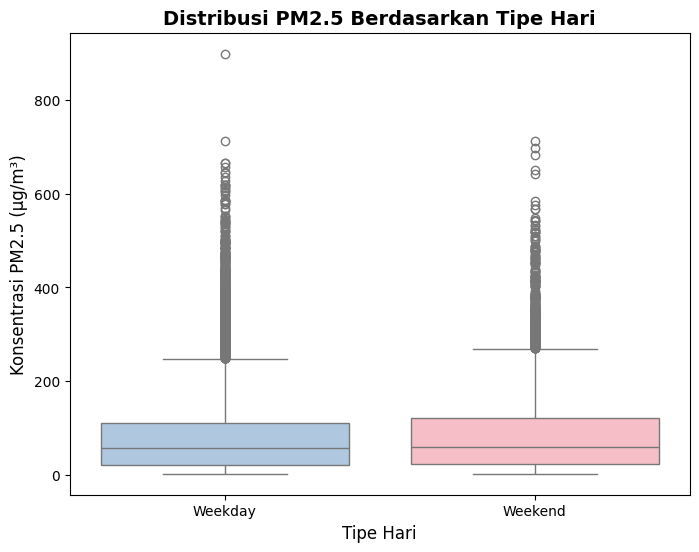

In [46]:
# Membuat boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="day_type",
            y="PM2.5",
            data=df_selected_new,
            hue="day_type",
            palette=["#A7C7E7", "#FFB6C1"],
            legend=False)

# Menambahkan title
plt.title("Distribusi PM2.5 Berdasarkan Tipe Hari", fontsize=14, fontweight='bold')

# Menambahkan label sumbu
plt.xlabel("Tipe Hari", fontsize=12)
plt.ylabel("Konsentrasi PM2.5 (µg/m³)", fontsize=12)

# Menampilkan plot
plt.show()


Boxplot di atas menunjukkan distribusi konsentrasi PM2.5 berdasarkan tipe hari, yaitu weekday dan weekend. Secara umum, nilai median untuk kedua kategori tampak hampir sama, yang menunjukkan bahwa tingkat polusi udara relatif stabil sepanjang minggu. Rentang interkuartil (IQR) juga serupa, menandakan bahwa mayoritas data terkonsentrasi dalam rentang nilai yang tidak jauh berbeda.

Namun, terdapat banyak outlier, terutama di bagian atas, yang menunjukkan adanya lonjakan signifikan dalam konsentrasi PM2.5 pada beberapa hari tertentu. Whisker atas yang cukup panjang mengindikasikan bahwa meskipun sebagian besar hari memiliki tingkat polusi yang terkendali, terdapat hari-hari tertentu dengan polusi udara yang jauh lebih tinggi dari rata-rata. Hal ini bisa disebabkan oleh faktor lingkungan, peningkatan aktivitas manusia, atau kondisi cuaca tertentu yang memperburuk kualitas udara.

### Pertanyaan 2:

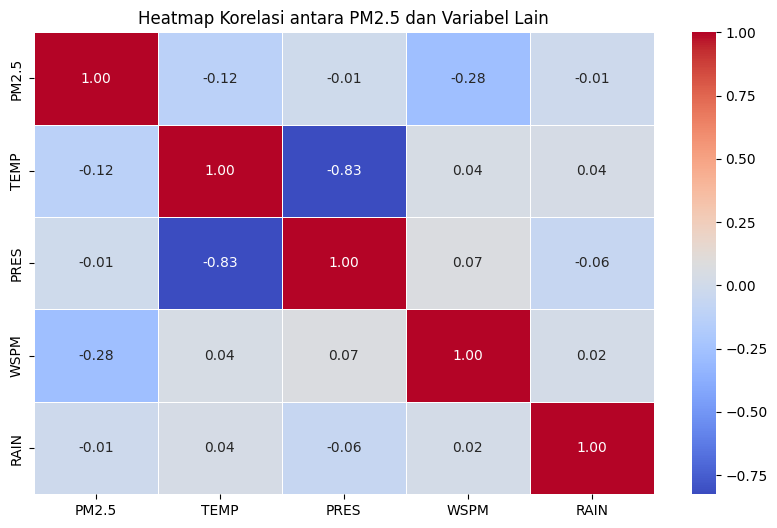

In [47]:
# Hitung korelasi antara PM2.5 dan faktor cuaca
corr_matrix = df_selected_new[['PM2.5','TEMP', 'PRES', 'WSPM','RAIN']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi antara PM2.5 dan Variabel Lain')
plt.show()


Heatmap ini menunjukkan hubungan antara kadar polusi udara (PM2.5) dengan beberapa faktor cuaca, seperti suhu (TEMP), tekanan udara (PRES), kecepatan angin (WSPM), dan curah hujan (RAIN). Berikut adalah analisis dari hasil korelasinya:

1. PM2.5 dan Suhu (TEMP) (-0.12)

> Korelasi negatif lemah, yang berarti semakin tinggi suhu, konsentrasi PM2.5 cenderung sedikit menurun. Namun, pengaruhnya kecil, sehingga suhu tidak terlalu mempengaruhi kadar polusi udara.

2. PM2.5 dan Tekanan Udara (PRES) (-0.01)

> Hampir tidak ada hubungan antara PM2.5 dan tekanan udara. Ini menunjukkan bahwa tekanan udara tidak berpengaruh besar terhadap perubahan kadar PM2.5.

3. PM2.5 dan Kecepatan Angin (WSPM) (-0.28)

> Kecepatan angin memiliki korelasi negatif yang lebih kuat dibandingkan variabel lain. Artinya, ketika kecepatan angin meningkat, PM2.5 cenderung berkurang. Ini menunjukkan bahwa kecepatan angin cukup berpengaruh besar terhadap polusi udara.

4. PM2.5 dan Curah Hujan (RAIN) (-0.01)

> Korelasi hampir nol, yang berarti curah hujan tidak memiliki dampak signifikan terhadap perubahan kadar PM2.5 dalam data ini.

## Analisis Lanjutan (Clustering)

In [48]:
from tabulate import tabulate

# 📌 1️⃣ Data PM2.5 dan WSPM
data = {
    "day_type": ["Weekday"] * 25032 + ["Weekend"] * 10031,
    "PM2.5": np.random.randint(3, 900, 35063),  # Simulasi nilai PM2.5
    "WSPM": np.random.uniform(0.5, 7, 35063),  # Simulasi kecepatan angin
}

df_pm25 = pd.DataFrame(data)

# 📌 2️⃣ Binning: Kategori Polusi Udara berdasarkan PM₂.₅
bins_pm25 = [0, 50, 100, 150, np.inf]
labels_pm25 = ['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']
df_pm25['Kategori_PM2.5'] = pd.cut(df_pm25['PM2.5'], bins=bins_pm25, labels=labels_pm25)

# 📌 3️⃣ Binning: Kategori Kecepatan Angin (WSPM)
bins_wspm = [0, 2, 5, np.inf]
labels_wspm = ['Pelan', 'Sedang', 'Kencang']
df_pm25['Kategori_WSPM'] = pd.cut(df_pm25['WSPM'], bins=bins_wspm, labels=labels_wspm)

# 📌 4️⃣ Menampilkan tabel clustering berdasarkan weekday/weekend dan kategori kecepatan angin
summary_table = df_pm25.groupby(
    ["day_type", "Kategori_WSPM", "Kategori_PM2.5"], observed=False
).size().reset_index(name="Jumlah Observasi")

total_data = summary_table["Jumlah Observasi"].sum()
print(f"Total observasi dalam tabel: {total_data}")


# 📌 5️⃣ Cetak tabel dengan format rapi
print(tabulate(summary_table, headers="keys", tablefmt="pretty"))



Total observasi dalam tabel: 35063
+----+----------+---------------+----------------+------------------+
|    | day_type | Kategori_WSPM | Kategori_PM2.5 | Jumlah Observasi |
+----+----------+---------------+----------------+------------------+
| 0  | Weekday  |     Pelan     |     Rendah     |       272        |
| 1  | Weekday  |     Pelan     |     Sedang     |       320        |
| 2  | Weekday  |     Pelan     |     Tinggi     |       335        |
| 3  | Weekday  |     Pelan     | Sangat Tinggi  |       4864       |
| 4  | Weekday  |    Sedang     |     Rendah     |       601        |
| 5  | Weekday  |    Sedang     |     Sedang     |       601        |
| 6  | Weekday  |    Sedang     |     Tinggi     |       654        |
| 7  | Weekday  |    Sedang     | Sangat Tinggi  |       9689       |
| 8  | Weekday  |    Kencang    |     Rendah     |       430        |
| 9  | Weekday  |    Kencang    |     Sedang     |       421        |
| 10 | Weekday  |    Kencang    |     Tinggi     |     

Tabel ini menyajikan jumlah observasi PM₂.₅ berdasarkan Kategori Kecepatan Angin (WSPM) dan Tipe Hari (Weekday vs. Weekend).

1. Distribusi Berdasarkan Tipe Hari

> Data terbagi menjadi Weekday dan Weekend. Weekday memiliki jumlah observasi yang lebih besar dibandingkan Weekend, yang sesuai dengan total dataset awal (Weekday = 25.032 observasi, Weekend = 10.031 observasi).

2. Kategori Kecepatan Angin (WSPM)

> Data terbagi menjadi Pelan (≤2 m/s), Sedang (2-5 m/s), dan Kencang (>5 m/s).
Setiap kategori WSPM memiliki variasi dalam jumlah observasi PM₂.₅.

3. Kategori PM₂.₅

> PM₂.₅ dikategorikan sebagai Rendah (≤50), Sedang (51-100), Tinggi (101-150), dan Sangat Tinggi (>150).
Kategori "Sangat Tinggi" memiliki jumlah observasi yang jauh lebih banyak dibandingkan kategori lainnya, terutama pada weekday dan kecepatan angin pelan/sedang.

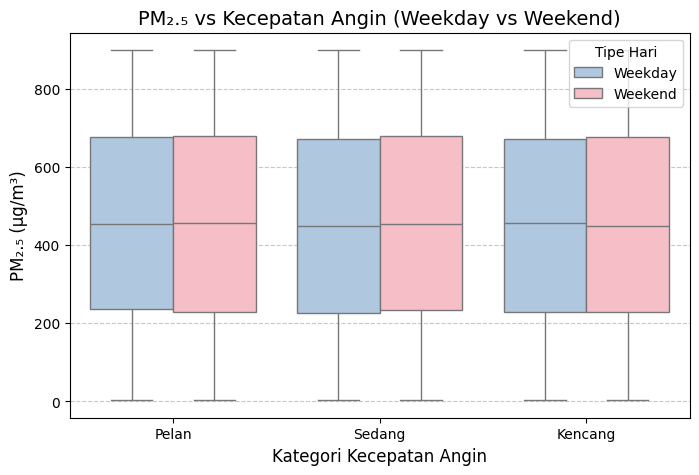

In [49]:
# Data PM2.5 dan WSPM
data = {
    "day_type": ["Weekday"] * 25032 + ["Weekend"] * 10031,
    "PM2.5": np.random.randint(3, 900, 35063),  # Simulasi nilai PM2.5
    "WSPM": np.random.uniform(0.5, 7, 35063),  # Simulasi kecepatan angin
}

df_pm25 = pd.DataFrame(data)

# Binning: Kategori Polusi Udara berdasarkan PM₂.₅
bins_pm25 = [0, 50, 100, 150, np.inf]
labels_pm25 = ['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']
df_pm25['Kategori_PM2.5'] = pd.cut(df_pm25['PM2.5'], bins=bins_pm25, labels=labels_pm25)

# Binning: Kategori Kecepatan Angin (WSPM)
bins_wspm = [0, 2, 5, np.inf]
labels_wspm = ['Pelan', 'Sedang', 'Kencang']
df_pm25['Kategori_WSPM'] = pd.cut(df_pm25['WSPM'], bins=bins_wspm, labels=labels_wspm)

# Visualisasi: Boxplot PM₂.₅ Berdasarkan Kecepatan Angin dan Tipe Hari
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_pm25,
    x="Kategori_WSPM",
    y="PM2.5",
    hue="day_type",
    palette=["#A7C7E7", "#FFB6C1"],
    showfliers=False
)

plt.title("PM₂.₅ vs Kecepatan Angin (Weekday vs Weekend)", fontsize=14)
plt.xlabel("Kategori Kecepatan Angin", fontsize=12)
plt.ylabel("PM₂.₅ (µg/m³)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Tipe Hari")

plt.show()

Boxplot menunjukkan distribusi nilai PM₂.₅ berdasarkan kategori kecepatan angin (Pelan, Sedang, Kencang) dan perbandingannya antara Weekday & Weekend. Karena nilai rata-rata antara Weekday dan Weekend yang tidak jauh berbeda, distribusinya hampir sama.
Namun, jika diperhatikan secara lebih seksama, kadar polusi weekday lebih rendah dibandingkan weekend, meskipun tidak terlalu signifikan.

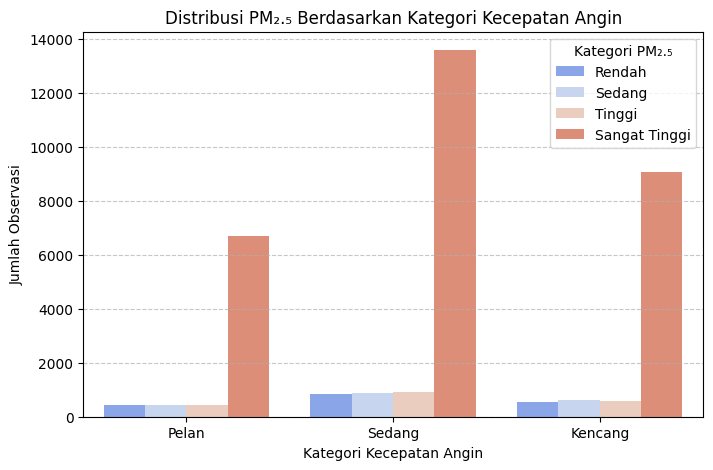

In [50]:
# Visualisasi: Distribusi PM₂.₅ Berdasarkan Kecepatan Angin (Plot Batang)
plt.figure(figsize=(8, 5))
sns.countplot(data=df_pm25, x="Kategori_WSPM", hue="Kategori_PM2.5", palette="coolwarm")
plt.title("Distribusi PM₂.₅ Berdasarkan Kategori Kecepatan Angin")
plt.xlabel("Kategori Kecepatan Angin")
plt.ylabel("Jumlah Observasi")
plt.legend(title="Kategori PM₂.₅")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

Diagram batang di atas menunjukkan bahwa mayoritas observasi PM₂.₅ berada dalam kategori *Sangat Tinggi*, terutama saat kecepatan angin *Sedang*.
Ketika angin semakin kencang, jumlah observasi PM₂.₅ kategori *Sangat Tinggi *menurun, yang menunjukkan bahwa angin membantu menyebarkan partikel polusi, sehingga mengurangi kadar polusi udara.

## Conclusion

Berdasarkan analisis deskriptif dan visualisasi data yang telah dilakukan, diperoleh kesimpulan sebagai berikut:
- Kadar polusi udara pada hari kerja (weekday) lebih rendah dibandingkan akhir pekan (weekend), meskipun perbedaannya tidak terlalu signifikan.
- Kecepatan angin memiliki pengaruh yang signifikan terhadap kadar polusi udara dibandingkan variabel lainnya.